### Import libraries

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


### Define features

In [7]:
# Define the number of entities
num_entities = 5000

# Define value ranges and probabilities
clients_range = [(11, 200, 40), (201, 500, 30), (501, 1000, 30)]
infraction_types = ['None', 'Minor', 'Major']
infraction_type_probs = [0.5, 0.3, 0.2]
infraction_timelines = ['None', 'Within past year', 'Within past 1-3 years']
infraction_timeline_probs = [0.5, 0.25, 0.25]
complaints = ['None', 'Minor', 'Major']
complaints_probs = [0.6, 0.25, 0.15]
sentiments = ['None', 'Flagged']
sentiments_probs = [0.7, 0.3]
inspection_results = ['Pass', 'Fail', 'None']
inspection_results_probs = [0.5, 0.25, 0.25]


### Define Functions

In [8]:
# Function to generate a random number of clients
def random_clients():
    choice = random.choices(clients_range, [prob for _, _, prob in clients_range])[0]
    return random.randint(choice[0], choice[1])

# Function to determine risk category based on total risk score
def get_risk_category(risk_score):
    if risk_score < 7:
        return 'Low'
    elif 7 <= risk_score <= 12:
        return 'Moderate'
    else:
        return 'High'

### Synthetic Data generation

In [9]:
# Generate the data
data = []
for i in range(1, num_entities + 1):
    entity_id = f"E{i:04d}"
    annual_clients = random_clients()
    infraction_type = random.choices(infraction_types, infraction_type_probs)[0]
    infraction_timeline = random.choices(infraction_timelines, infraction_timeline_probs)[0]
    public_complaints = random.choices(complaints, complaints_probs)[0]
    sentiment_analysis = random.choices(sentiments, sentiments_probs)[0]
    inspection_result = random.choices(inspection_results, inspection_results_probs)[0]

    # Calculate the risk score
    risk_score = 0
    risk_score += 1 if annual_clients < 200 else 2 if annual_clients <= 500 else 3
    risk_score += 1 if infraction_type == 'None' else 2 if infraction_type == 'Minor' else 3
    risk_score += 1 if infraction_timeline == 'None' else 3 if infraction_timeline == 'Within past year' else 2
    risk_score += 1 if public_complaints == 'None' else 2 if public_complaints == 'Minor' else 3
    risk_score += 1 if sentiment_analysis == 'None' else 2
    risk_score += 1 if inspection_result == 'Pass' else 2 if inspection_result == 'Fail' else 3

    # Determine risk category
    risk_category = get_risk_category(risk_score)

    data.append([
        entity_id, annual_clients, infraction_type, infraction_timeline,
        public_complaints, sentiment_analysis, inspection_result, risk_score, risk_category
    ])

# Create a DataFrame
df = pd.DataFrame(data, columns=[
    'Entity ID', 'Annual Clients', 'Infraction Type', 'Infraction Timeline',
    'Public Complaints', 'Sentiment Analysis', 'Inspection Results', 'Total Risk Score', 'Risk Category'
])

# Save to CSV
df.to_csv('synthetic_data.csv', index=False)

In [10]:
df.head()

,Entity ID,Annual Clients,Infraction Type,Infraction Timeline,Public Complaints,Sentiment Analysis,Inspection Results,Total Risk Score,Risk Category
0,E0001,116,None,None,Minor,Flagged,Fail,9,Moderate
1,E0002,84,None,Within past year,Minor,None,None,11,Moderate
2,E0003,166,None,Within past year,None,None,Pass,8,Moderate
3,E0004,84,None,Within past year,None,None,Fail,9,Moderate
4,E0005,186,Major,None,None,None,None,10,Moderate


### Understanding distribution of Risk Categories

Risk Category
Moderate    4456
High         439
Low          105
Name: count, dtype: int64
Risk Category
Moderate    89.12
High         8.78
Low          2.10
Name: proportion, dtype: float64


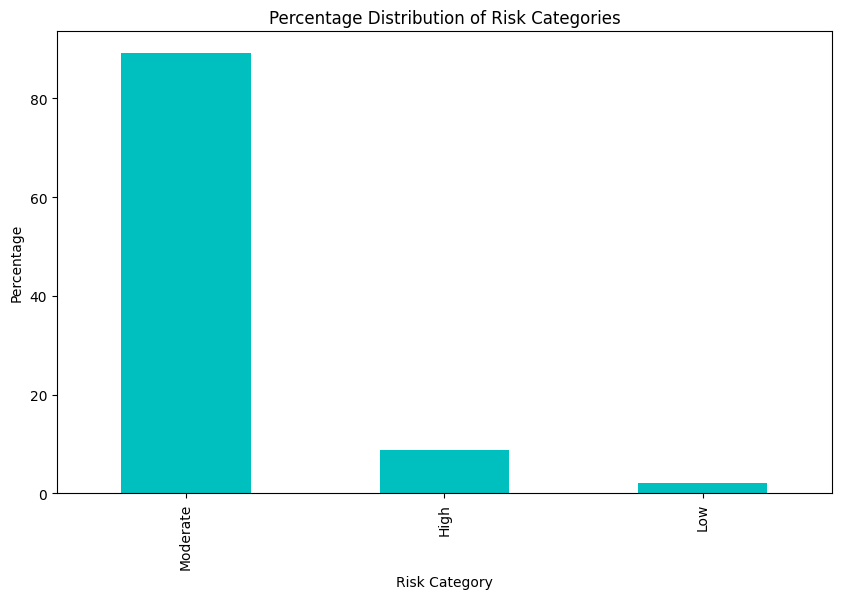

In [6]:

# Count the occurrences of each risk category
risk_category_counts = df['Risk Category'].value_counts()
print(risk_category_counts)

# Calculate the percentage of each risk category
risk_category_percentages = df['Risk Category'].value_counts(normalize=True) * 100
print(risk_category_percentages)


# Plot the percentage distribution of risk categories
plt.figure(figsize=(10, 6))
risk_category_percentages.plot(kind='bar', color='c')
plt.title('Percentage Distribution of Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Percentage')
plt.show()
